In [1]:
"""
This Jupyter Notebook contains code for data analysis and visualization.
"""

'\nThis Jupyter Notebook contains code for data analysis and visualization.\n'

In [2]:
import glob
from collections import Counter
import black
import jupyter_black
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from textblob import TextBlob
pd.options.mode.chained_assignment = None  # default='warn'
nltk.download("stopwords")
nltk.download("punkt")
jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

# World Cup 2022 EDA

In [3]:
# get file paths from folder
PATH = r"D:\FACU\TF_CSVs\*.csv"
file_paths = glob.glob(PATH)

In [4]:
# read all csvs into a list of dataframes
dfs = [
    pd.read_csv(file_path, sep=";", lineterminator="\r", parse_dates=True)
    for file_path in file_paths
]

In [5]:
# concatenate all dataframes into one
df = pd.concat(dfs)

In [6]:
# drop id column from csv
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [7]:
df

,tweet_id,tweets,likes,time
0,1.593005e+18,hay que ser patriota y cumplir la constitució...,0.0,2022-11-16 22:16:45+00:00
1,1.593005e+18,la decepción de esta copa mundial será argenti...,0.0,2022-11-16 22:16:44+00:00
2,1.593005e+18,como que se han dado cuenta unos cuantos años ...,0.0,2022-11-16 22:16:44+00:00
3,1.593005e+18,no sé si es su perfil pero le ruego deje el s...,0.0,2022-11-16 22:16:44+00:00
4,1.593005e+18,españa se aloja en el mismo lugar que la selec...,0.0,2022-11-16 22:16:43+00:00
...,...,...,...,...
17496,1.607491e+18,"epale pablo,sin duda para mí el dibu martínez...",1.0,2022-12-26 21:38:02+00:00
17497,1.607491e+18,tercera victoria consecutiva 💯|| liverpool 🔴 d...,1.0,2022-12-26 21:36:28+00:00
17498,1.607490e+18,ya el parlamento europeo sacó un proyecto de l...,1.0,2022-12-26 21:35:34+00:00
17499,1.607490e+18,"#entérate | ""dibu"" martínez habría podido pone...",1.0,2022-12-26 21:35:30+00:00


In [8]:
# check for NaN on tweet_id
df["tweet_id"].isnull().sum()

149

In [9]:
# check for NaN on time
df["time"].isnull().sum()

149

In [10]:
# check for NaN
df.isnull().sum().sum()

596

In [11]:
df = df.dropna(subset=["time"])

In [12]:
df.dropna()

,tweet_id,tweets,likes,time
0,1.593005e+18,hay que ser patriota y cumplir la constitució...,0.0,2022-11-16 22:16:45+00:00
1,1.593005e+18,la decepción de esta copa mundial será argenti...,0.0,2022-11-16 22:16:44+00:00
2,1.593005e+18,como que se han dado cuenta unos cuantos años ...,0.0,2022-11-16 22:16:44+00:00
3,1.593005e+18,no sé si es su perfil pero le ruego deje el s...,0.0,2022-11-16 22:16:44+00:00
4,1.593005e+18,españa se aloja en el mismo lugar que la selec...,0.0,2022-11-16 22:16:43+00:00
...,...,...,...,...
17495,1.607491e+18,‘dibu’ martínez se tatuó la copa del mundo con...,0.0,2022-12-26 21:39:18+00:00
17496,1.607491e+18,"epale pablo,sin duda para mí el dibu martínez...",1.0,2022-12-26 21:38:02+00:00
17497,1.607491e+18,tercera victoria consecutiva 💯|| liverpool 🔴 d...,1.0,2022-12-26 21:36:28+00:00
17498,1.607490e+18,ya el parlamento europeo sacó un proyecto de l...,1.0,2022-12-26 21:35:34+00:00


In [13]:
original_df = df.copy()

original_df

,tweet_id,tweets,likes,time
0,1.593005e+18,hay que ser patriota y cumplir la constitució...,0.0,2022-11-16 22:16:45+00:00
1,1.593005e+18,la decepción de esta copa mundial será argenti...,0.0,2022-11-16 22:16:44+00:00
2,1.593005e+18,como que se han dado cuenta unos cuantos años ...,0.0,2022-11-16 22:16:44+00:00
3,1.593005e+18,no sé si es su perfil pero le ruego deje el s...,0.0,2022-11-16 22:16:44+00:00
4,1.593005e+18,españa se aloja en el mismo lugar que la selec...,0.0,2022-11-16 22:16:43+00:00
...,...,...,...,...
17495,1.607491e+18,‘dibu’ martínez se tatuó la copa del mundo con...,0.0,2022-12-26 21:39:18+00:00
17496,1.607491e+18,"epale pablo,sin duda para mí el dibu martínez...",1.0,2022-12-26 21:38:02+00:00
17497,1.607491e+18,tercera victoria consecutiva 💯|| liverpool 🔴 d...,1.0,2022-12-26 21:36:28+00:00
17498,1.607490e+18,ya el parlamento europeo sacó un proyecto de l...,1.0,2022-12-26 21:35:34+00:00


## 01 - Lista de palabras más usadas

Queremos ver los datos

In [14]:
# Pre process removing stopwords\
df_01_wordsfreq = df
stop_words = set(stopwords.words("spanish"))
# convert the column to string type
df_01_wordsfreq["tweets"] = df_01_wordsfreq["tweets"].astype(str)
df_01_wordsfreq["tweets"] = df_01_wordsfreq["tweets"].apply(
    lambda x: " ".join(
        [
            word.lower()
            for word in x.split()
            if word.lower() not in stop_words
            and word.lower() not in ("si", "vs", "mundial")
            and word.isalpha()
        ]
    )
)

In [15]:
df_01_wordsfreq["tweets"] = df_01_wordsfreq["tweets"].apply(
    lambda x: nltk.word_tokenize(x)
)

In [16]:
word_list = [word for words in df_01_wordsfreq["tweets"] for word in words]

In [17]:
word_freq = Counter(word_list)

In [18]:
top_words = word_freq.most_common(20)

<BarContainer object of 10 artists>

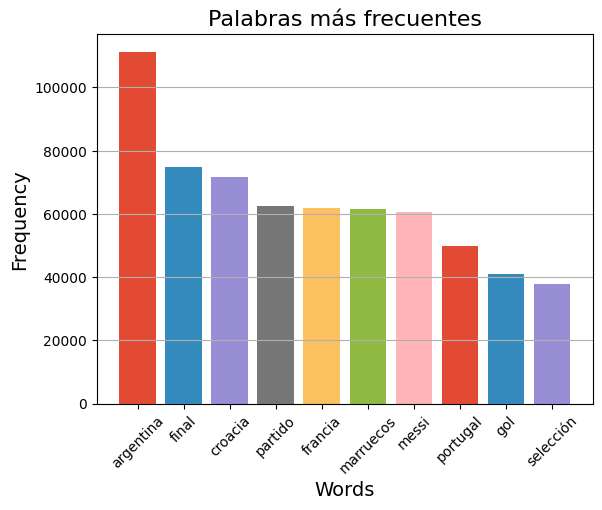

In [19]:
# Get the top 10 most common words
top_words = dict(word_freq.most_common(10))
# Create a bar chart of the top 10 most common words
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Palabras más frecuentes", fontsize=16)
style.use("ggplot")
plt.bar(
    list(top_words.keys()), list(top_words.values()), color=sns.color_palette()
)

### 01_1 - Palabras más usadas por día

In [20]:
# read all csvs into a list of dataframes
dfs = [
    pd.read_csv(file_path, sep=";", lineterminator="\r", parse_dates=True)
    for file_path in file_paths
]

In [21]:
# concatenate all dataframes into one
df = pd.concat(dfs)
df_01_daily_words = df

In [22]:
# reset index
df_01_daily_words = df_01_daily_words.reset_index()
# get the data types of the columns
print(df_01_daily_words.dtypes)

index           int64
Unnamed: 0     object
tweet_id      float64
tweets         object
likes         float64
time           object
dtype: object


In [23]:
# convert object data type to datetime data type
df_01_daily_words["time"] = pd.to_datetime(
    df_01_daily_words["time"], errors="coerce"
)

# check the data type of time column
print(df_01_daily_words["time"].dtype)

datetime64[ns, UTC]


In [24]:
# select rows with NaN values in time column
nan_time = df_01_daily_words[df_01_daily_words["time"].isna()]
nan_time

df_01_daily_words = df_01_daily_words.dropna(subset=["time"])

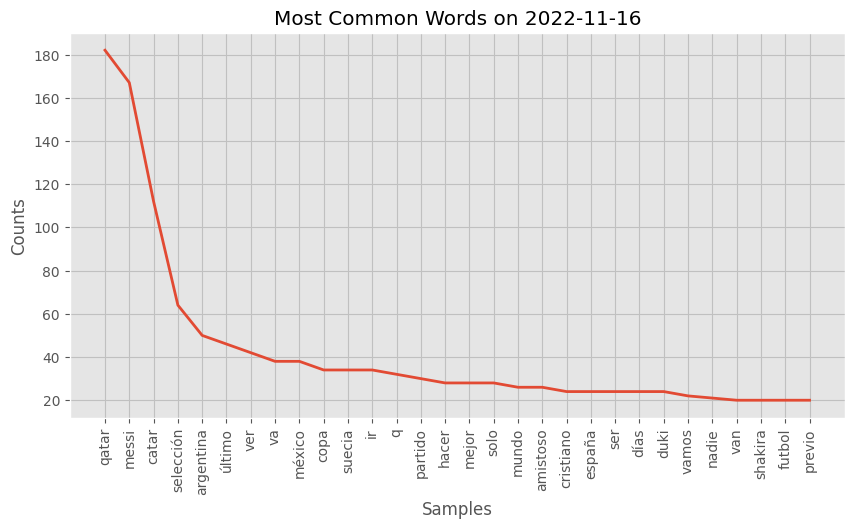

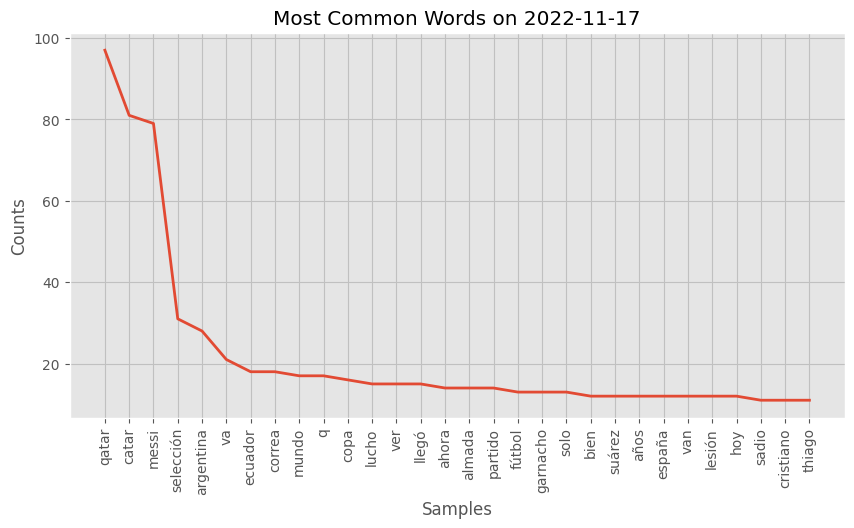

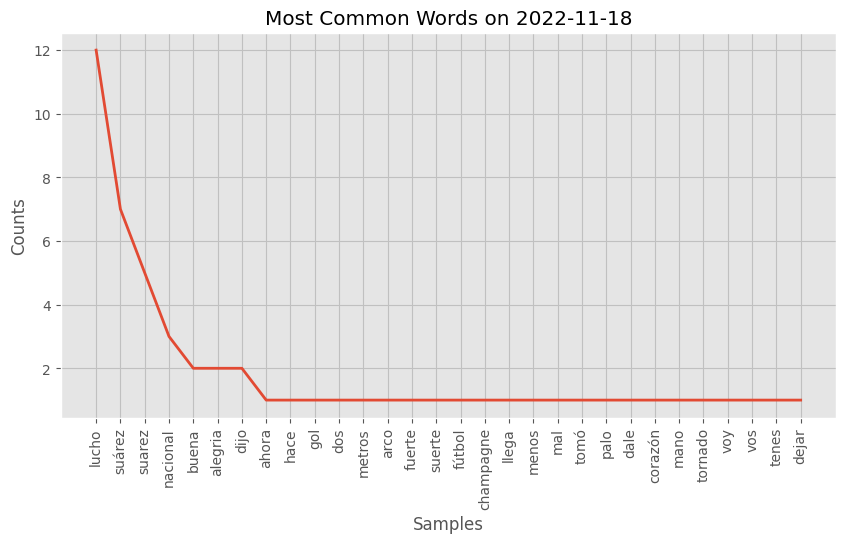

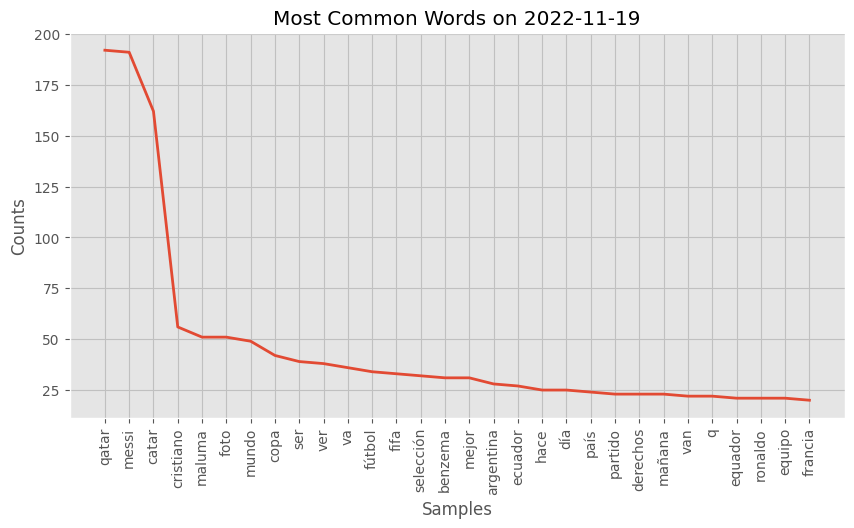

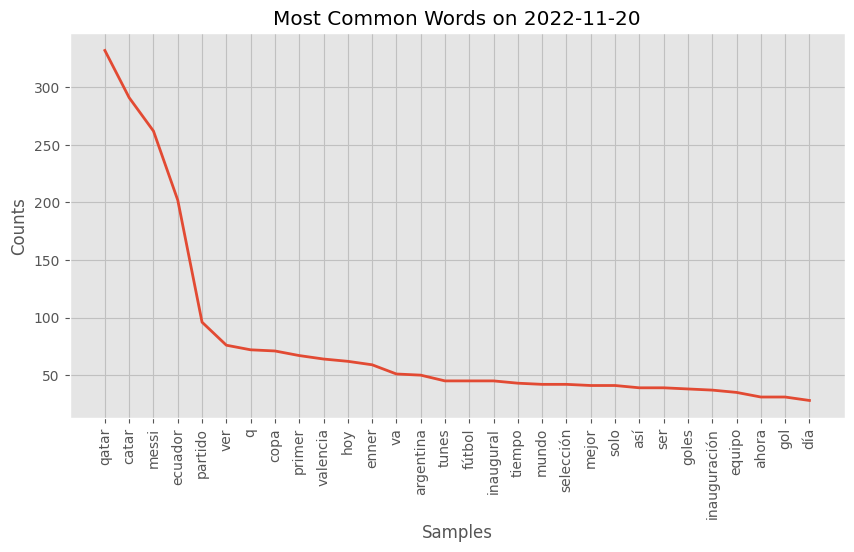

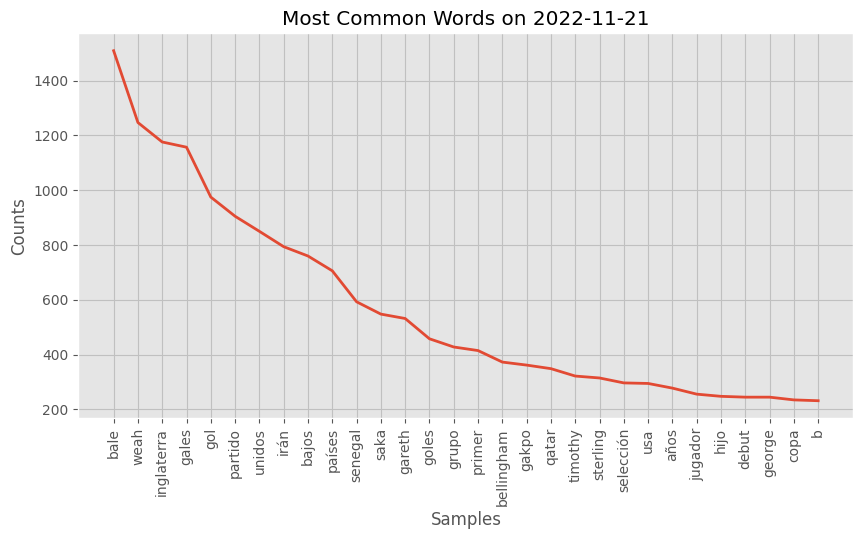

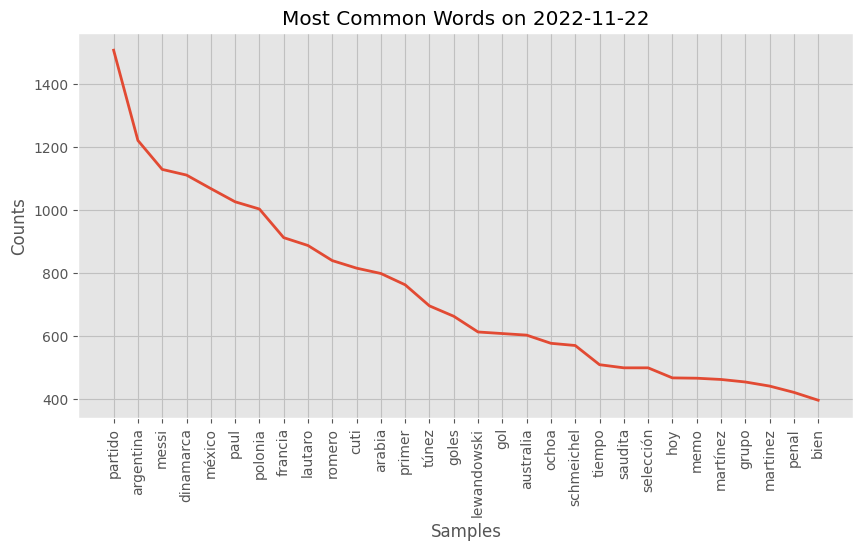

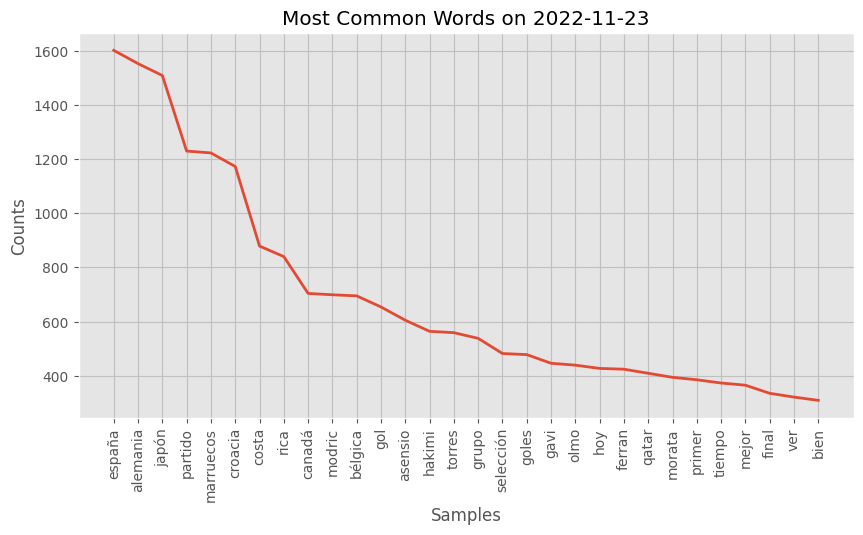

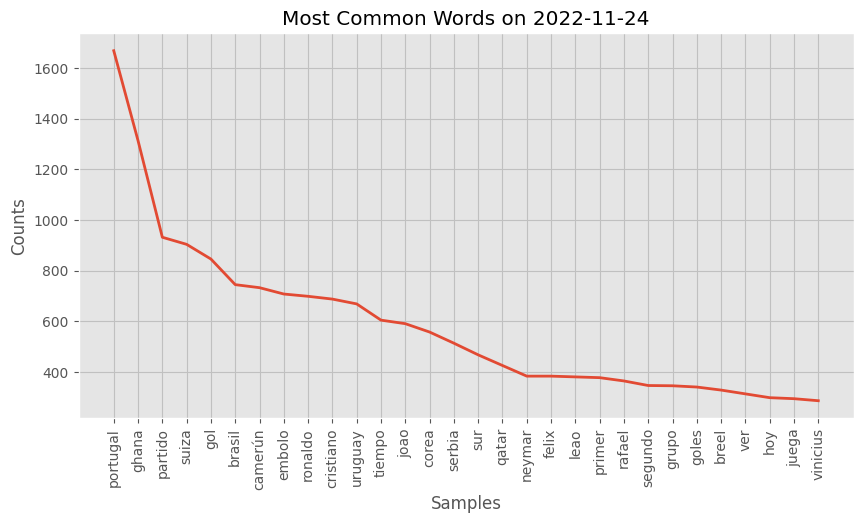

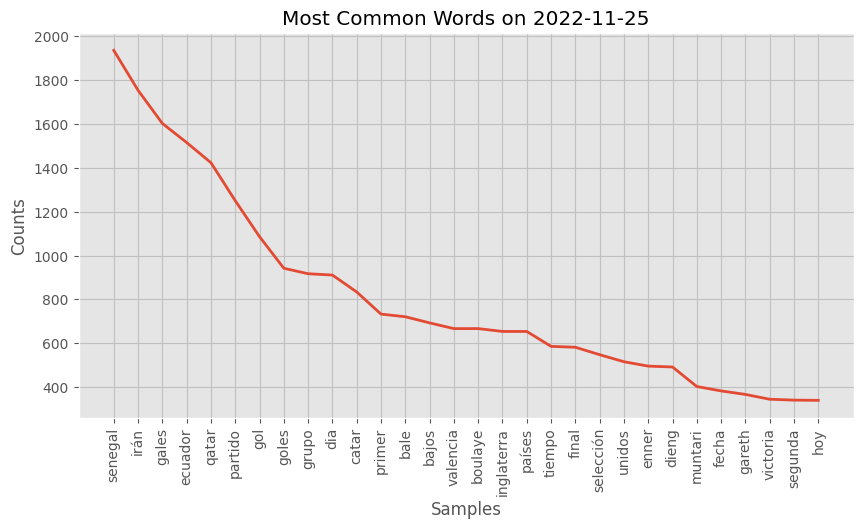

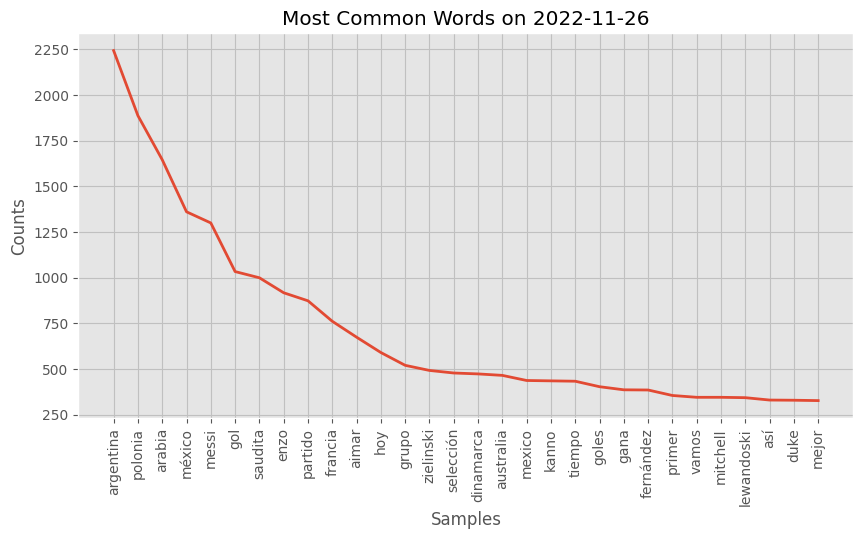

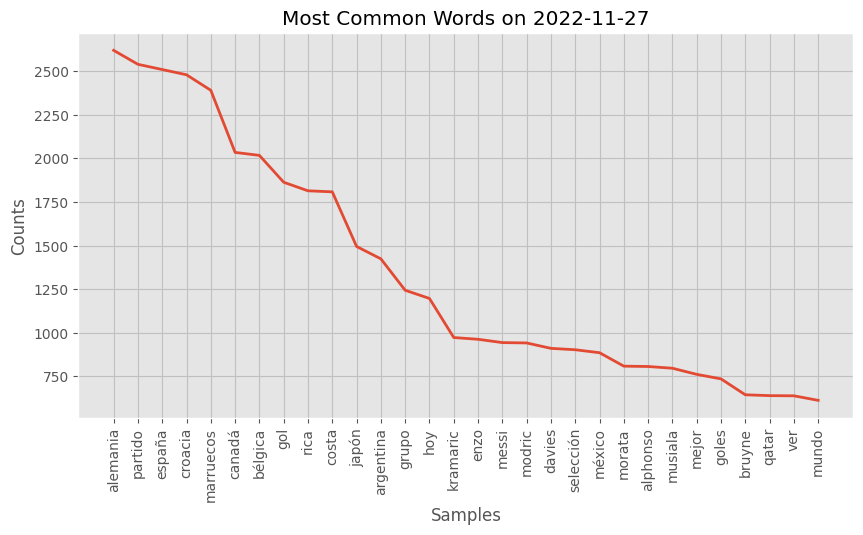

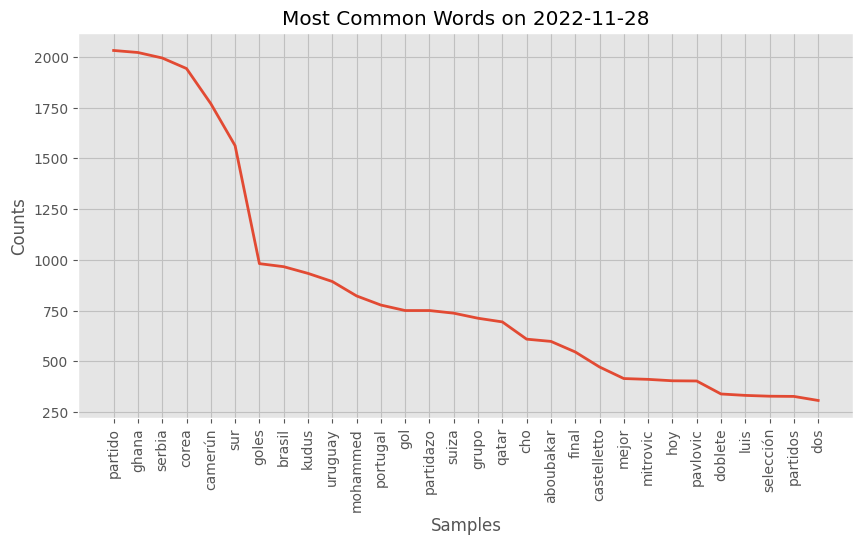

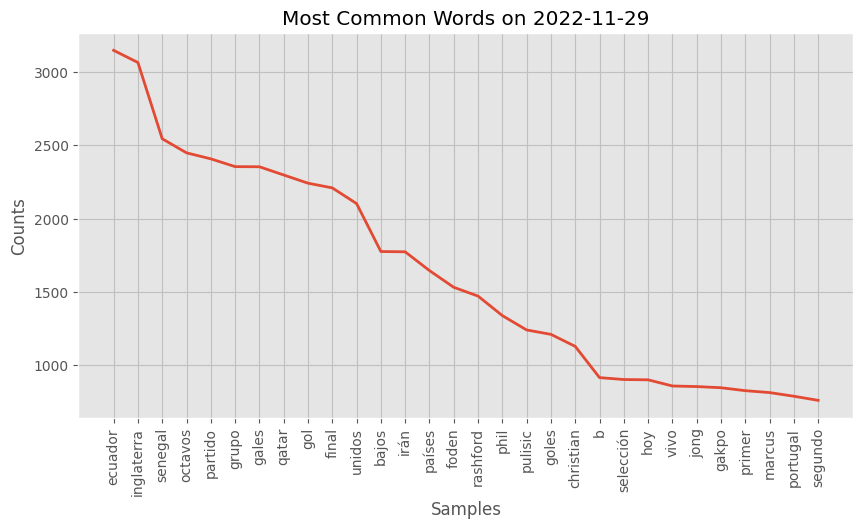

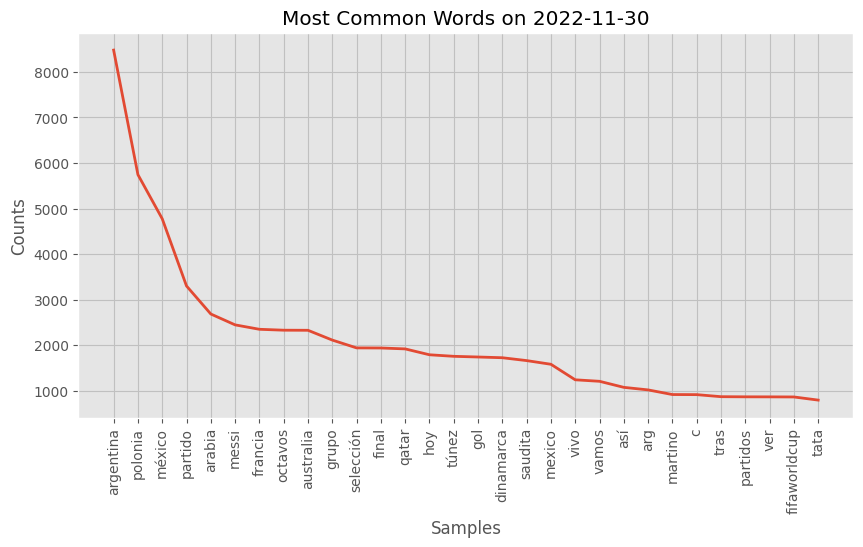

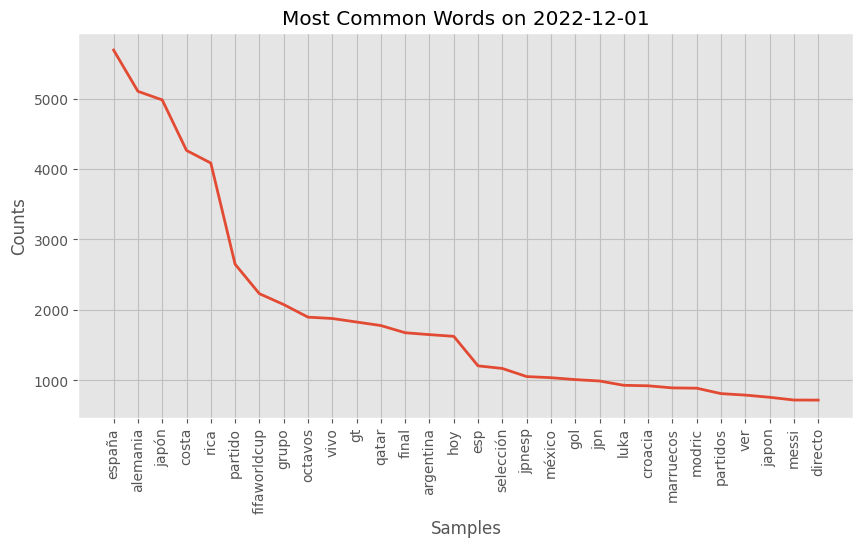

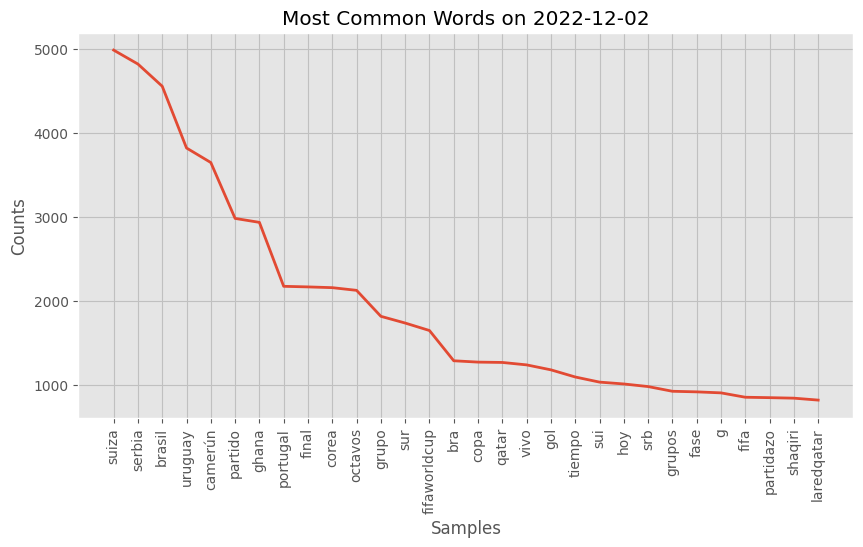

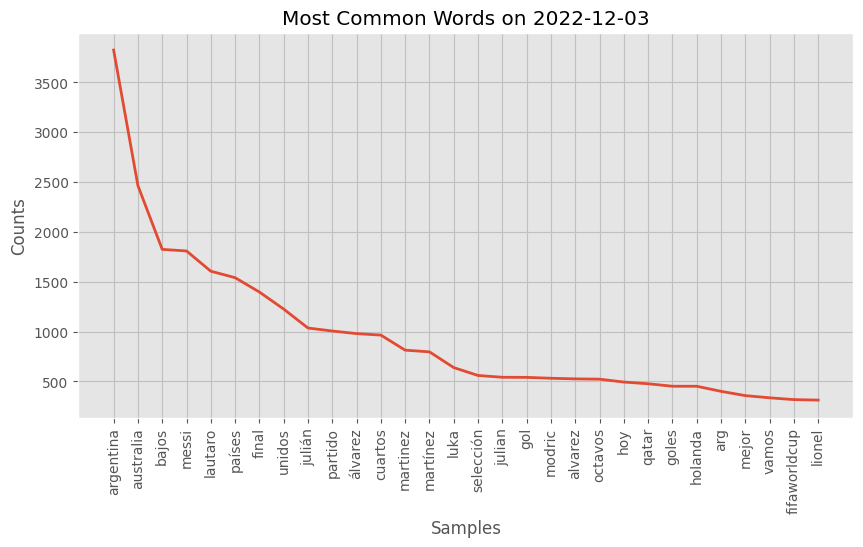

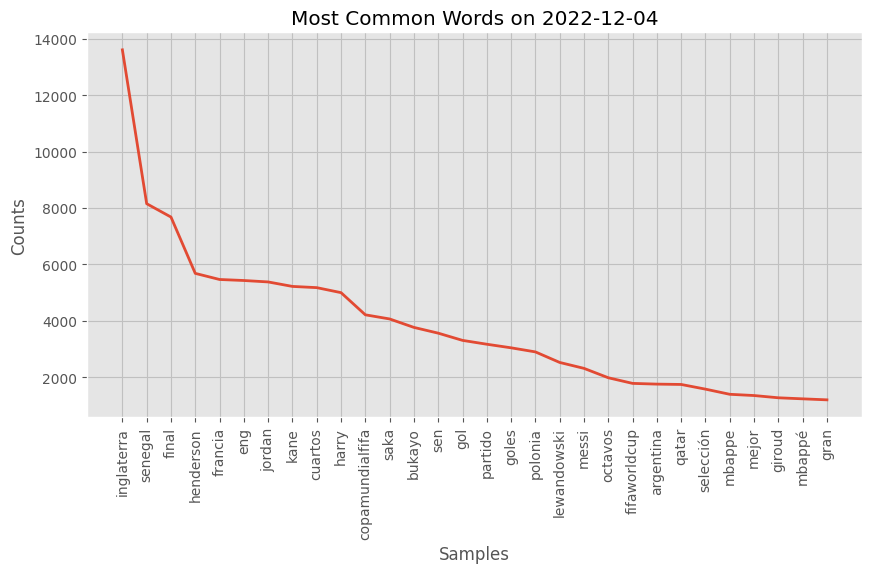

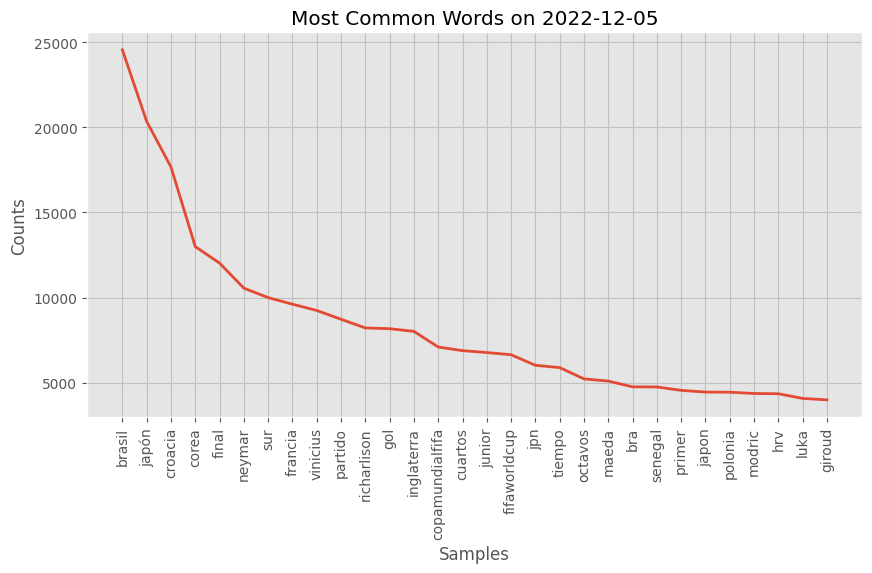

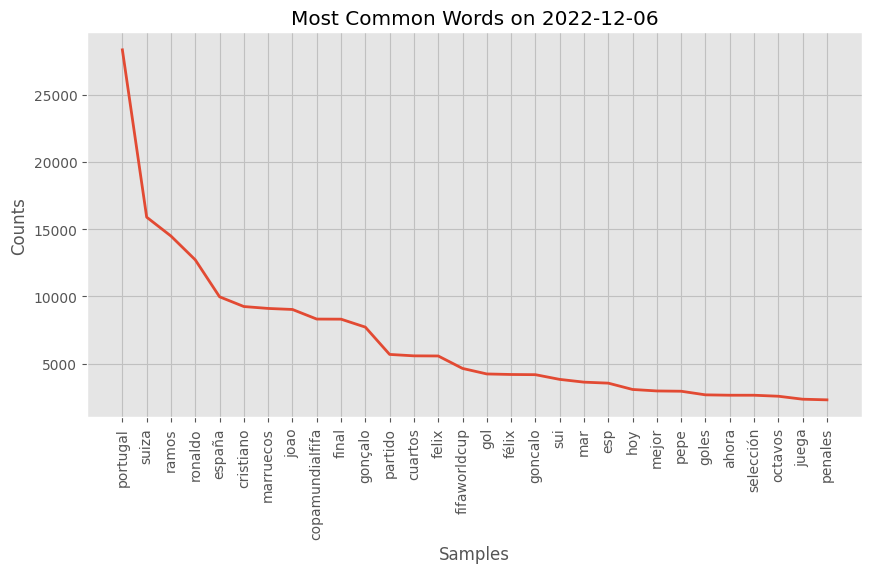

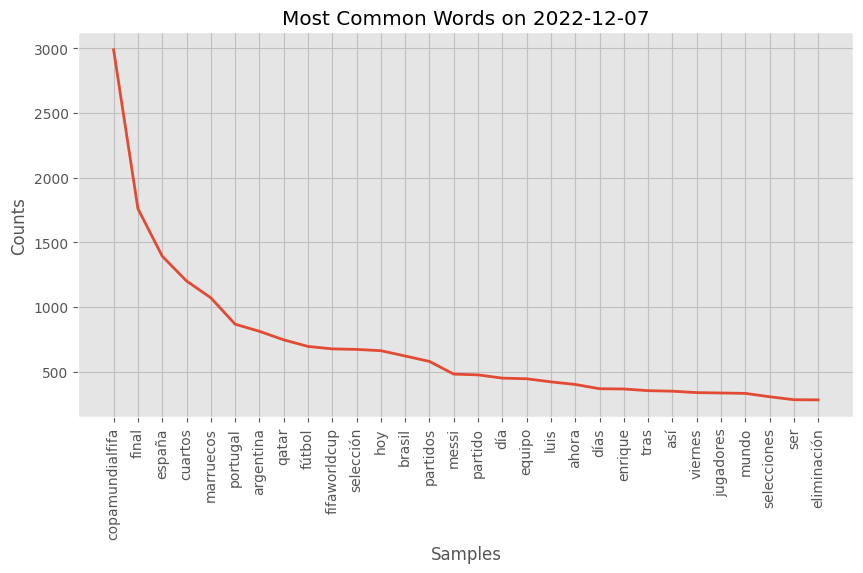

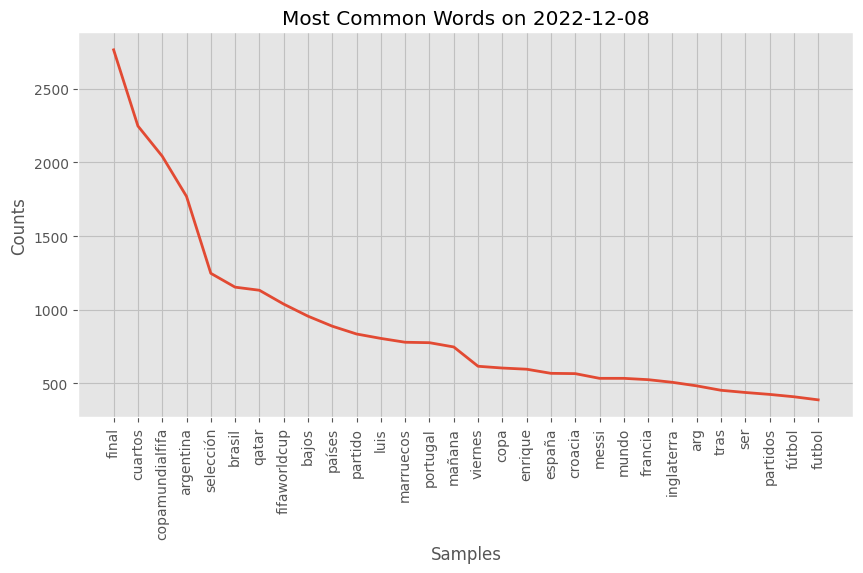

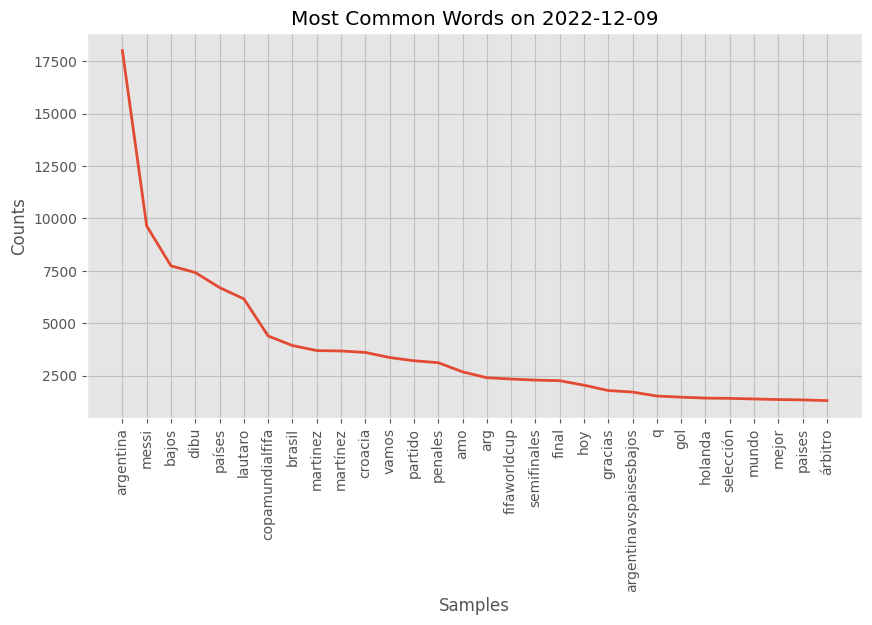

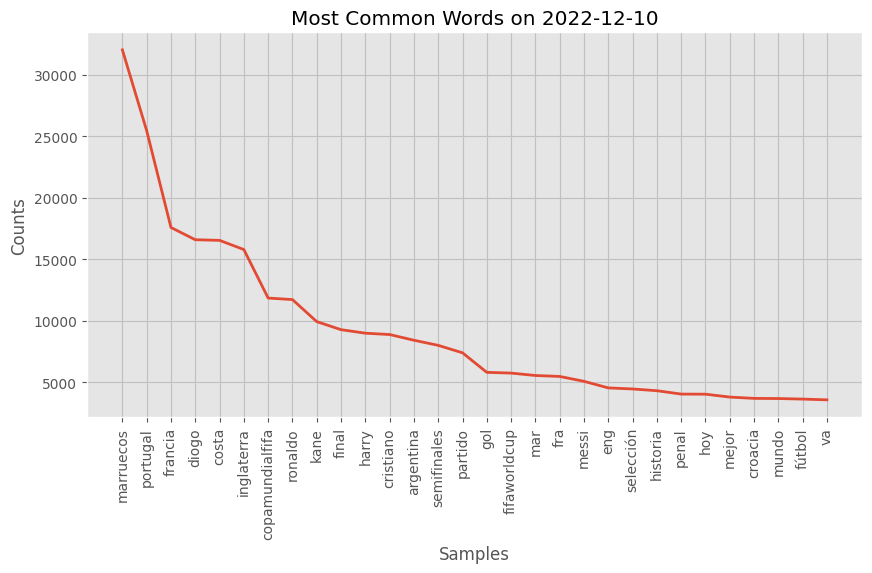

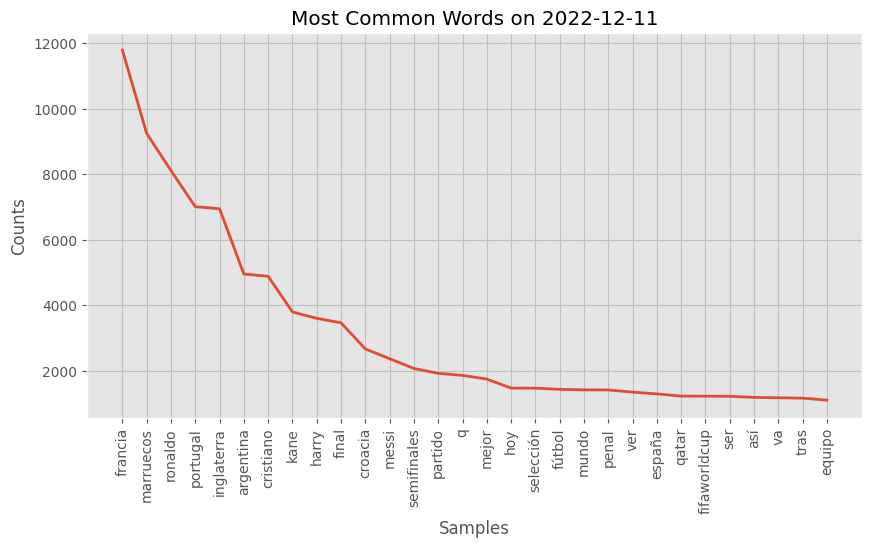

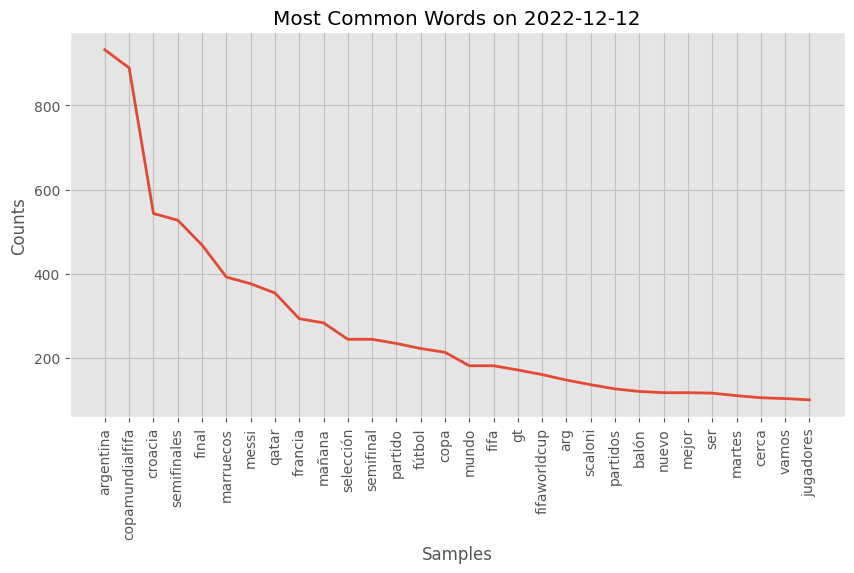

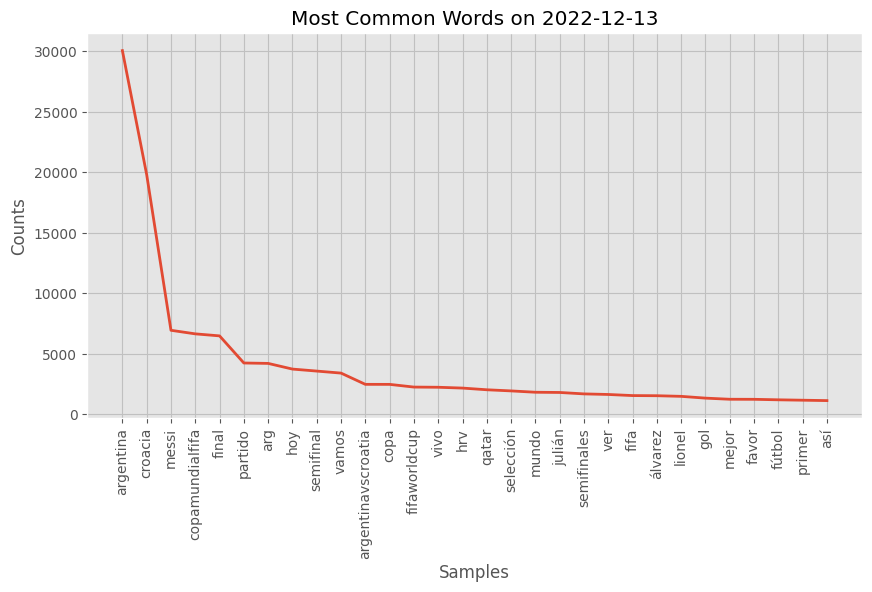

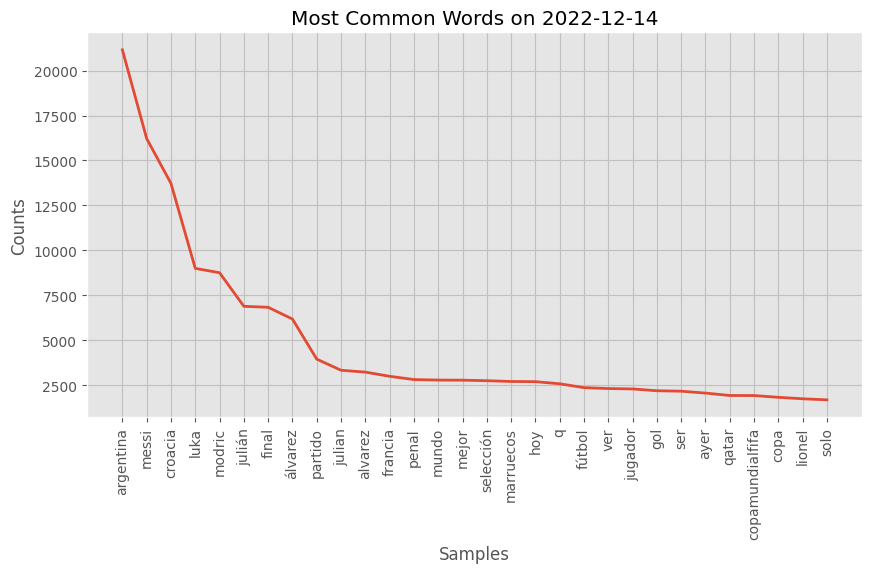

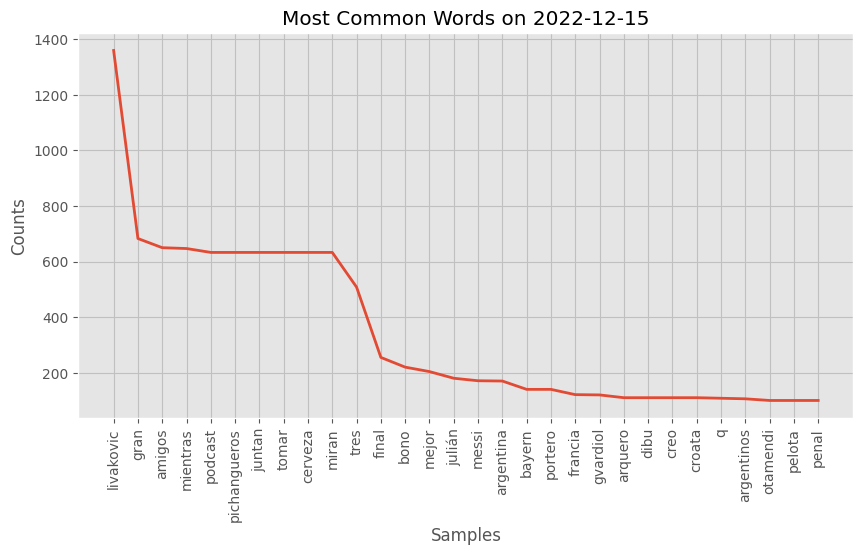

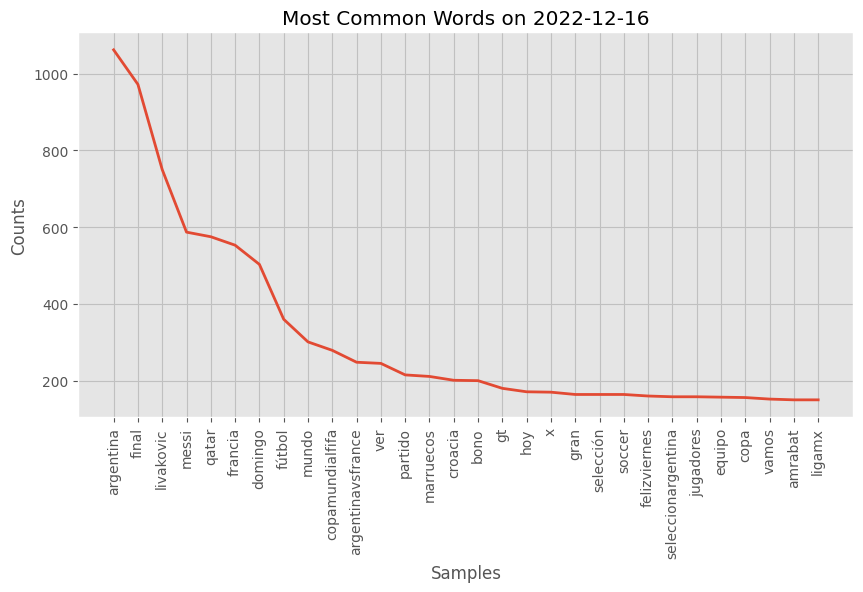

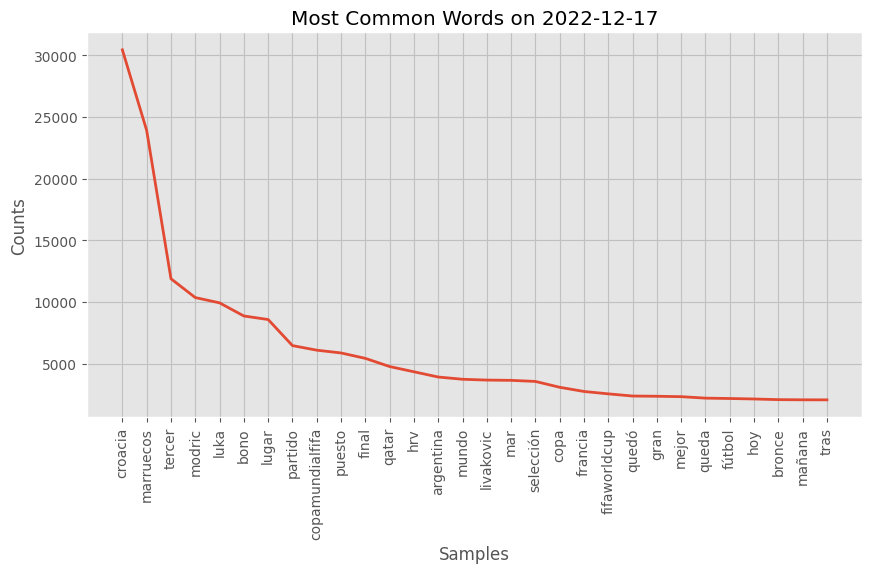

C:\Users\Cacu\Desktop\Universidad\Trabajo_Final\venv\env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 78069 (\N{EGYPTIAN HIEROGLYPH E030}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


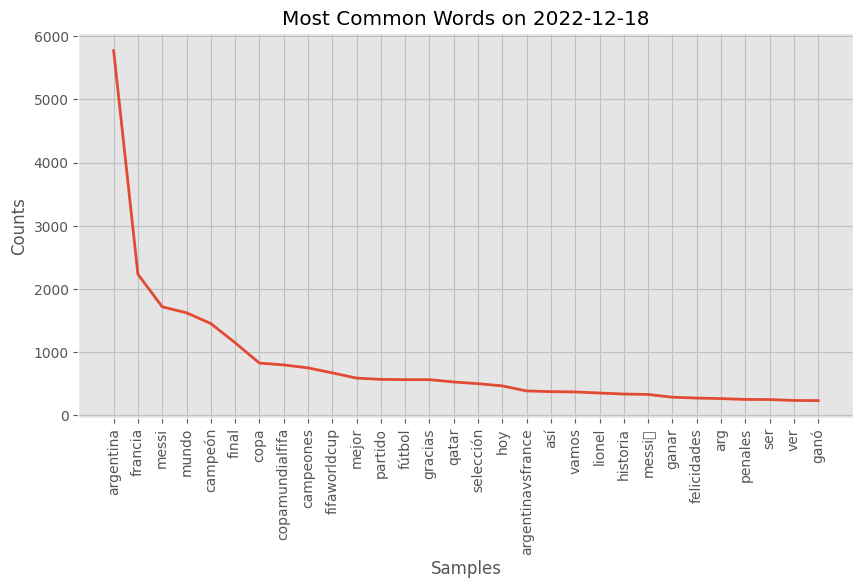

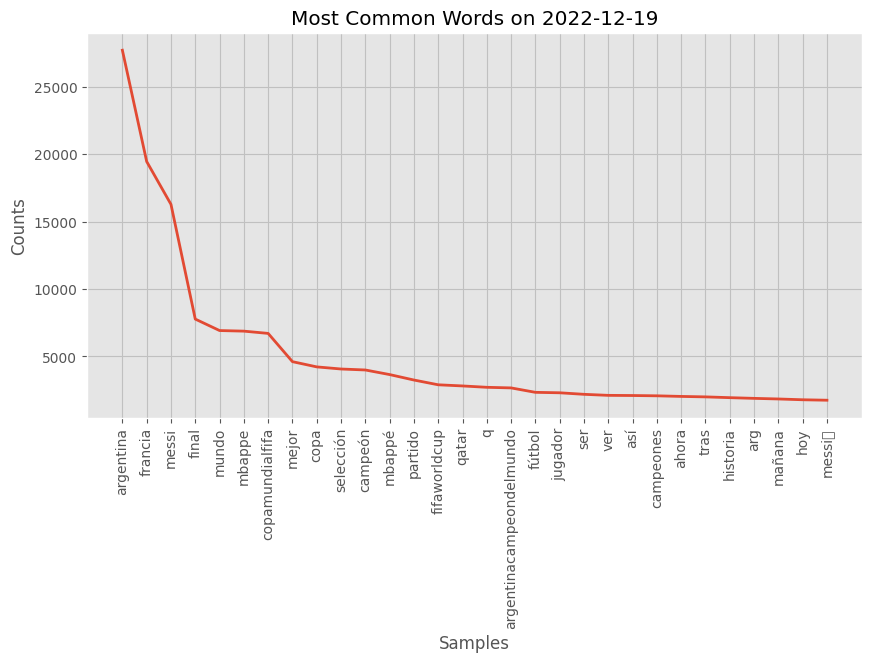

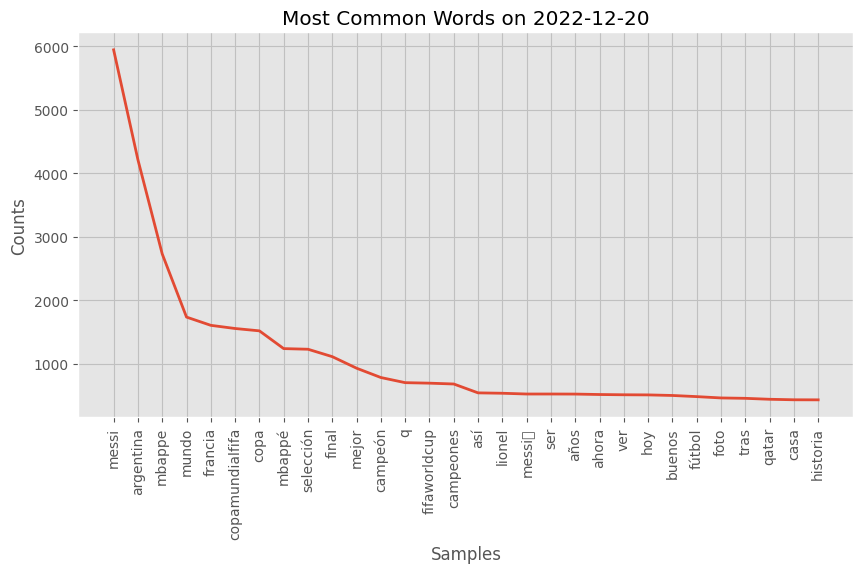

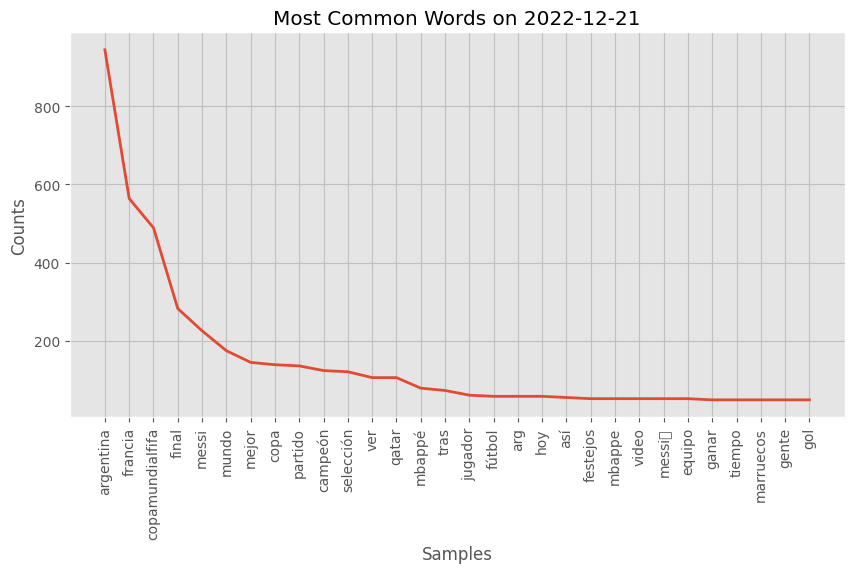

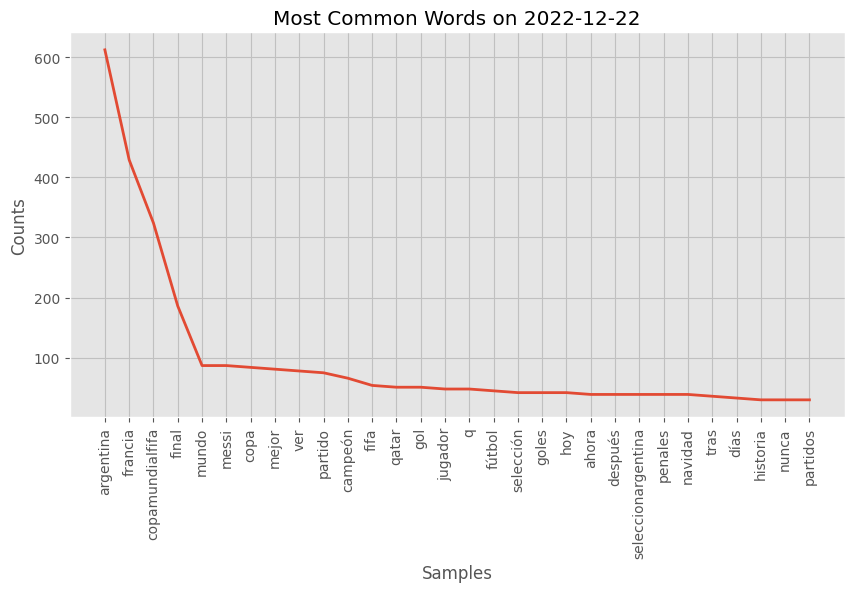

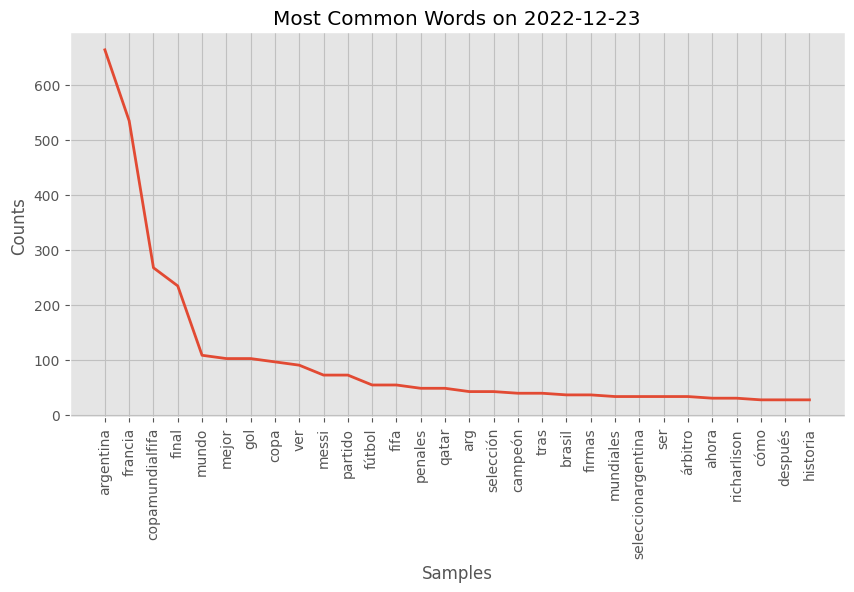

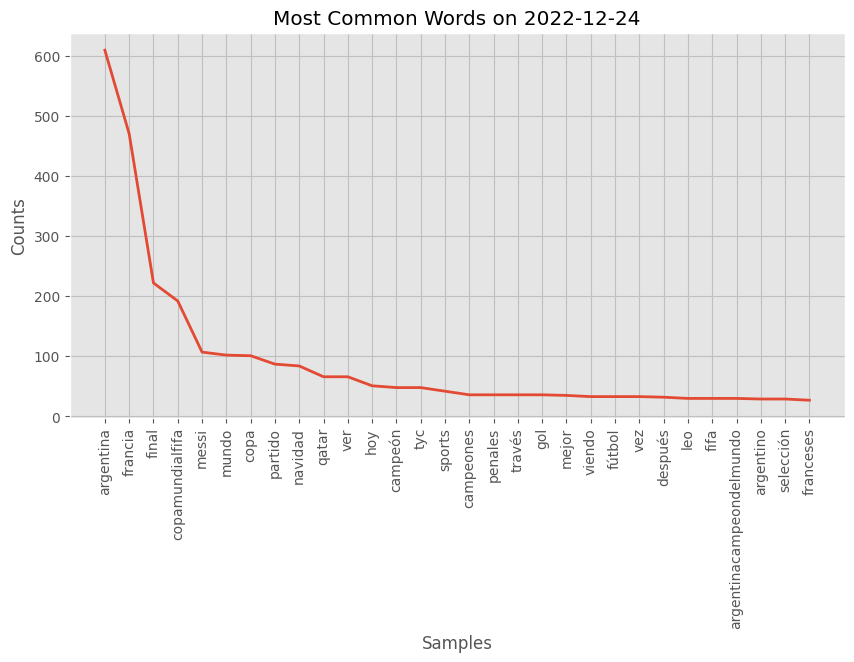

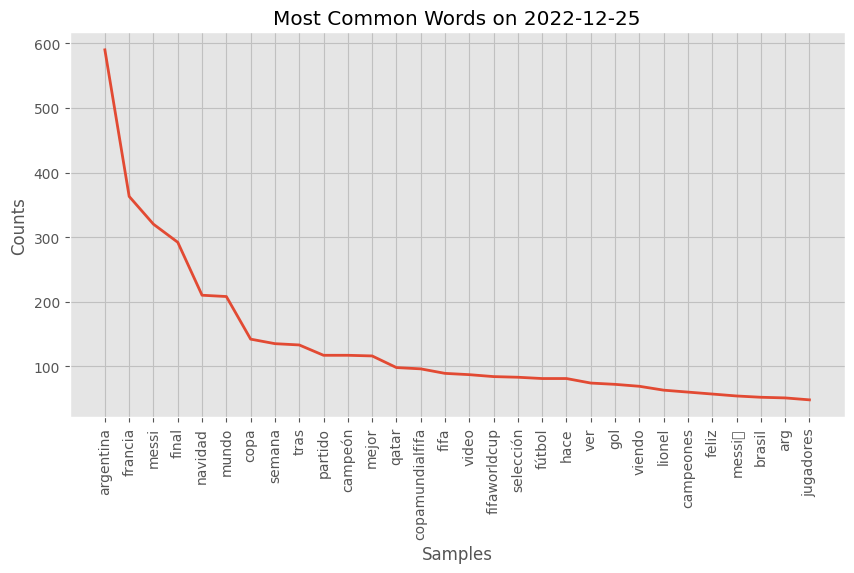

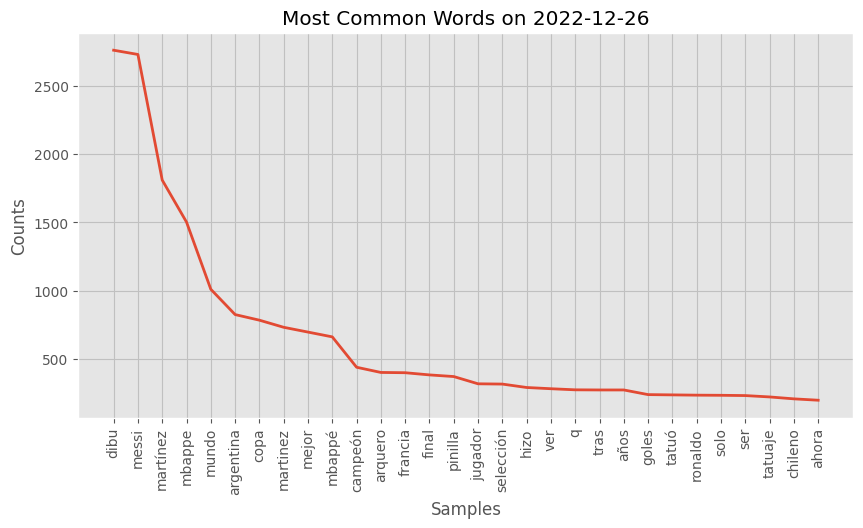

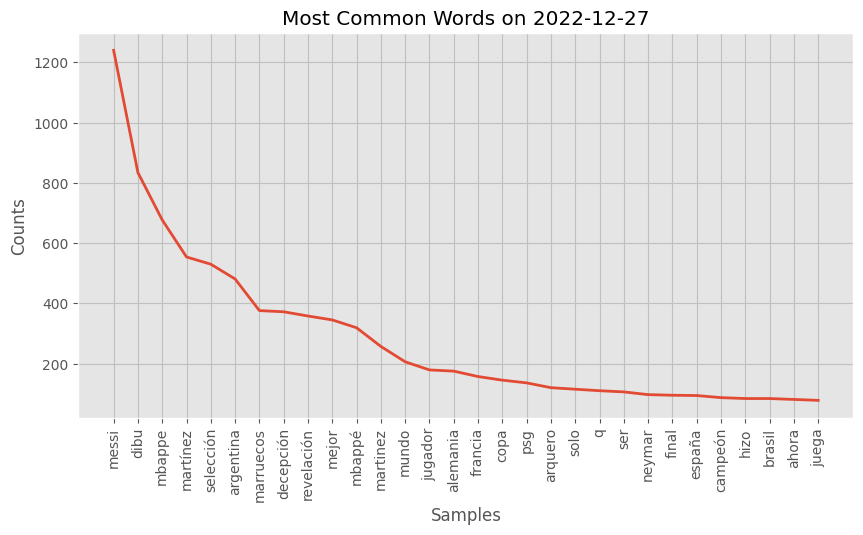

In [25]:
# Group the data by time
grouped = df_01_daily_words.groupby(pd.Grouper(key="time", freq="D"))

# Count the words in each group
word_counts = {}
stop_words = set(stopwords.words("spanish"))

for name, group in grouped:
    TEXT = " ".join(group["tweets"])
    words = nltk.word_tokenize(TEXT.lower())
    words = [
        word
        for word in words
        if word.isalpha()
        and word not in stop_words
        and word.lower() not in ("si", "vs", "mundial")
    ]
    freq_dist = nltk.FreqDist(words)
    word_counts[name.date()] = freq_dist

# Plot the results
for date, counts in word_counts.items():
    plt.figure(figsize=(10, 5))
    counts.plot(30, title=f"Most Common Words on {date}")
    plt.show()

In [26]:
# Sort the words based on their frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

sorted_words

[(datetime.date(2022, 11, 16),
  FreqDist({'qatar': 182, 'messi': 167, 'catar': 112, 'selección': 64, 'argentina': 50, 'último': 46, 'ver': 42, 'va': 38, 'méxico': 38, 'copa': 34, ...})),
 (datetime.date(2022, 11, 17),
  FreqDist({'qatar': 97, 'catar': 81, 'messi': 79, 'selección': 31, 'argentina': 28, 'va': 21, 'ecuador': 18, 'correa': 18, 'mundo': 17, 'q': 17, ...})),
 (datetime.date(2022, 11, 18),
  FreqDist({'lucho': 12, 'suárez': 7, 'suarez': 5, 'nacional': 3, 'buena': 2, 'alegria': 2, 'dijo': 2, 'ahora': 1, 'hace': 1, 'gol': 1, ...})),
 (datetime.date(2022, 11, 19),
  FreqDist({'qatar': 192, 'messi': 191, 'catar': 162, 'cristiano': 56, 'maluma': 51, 'foto': 51, 'mundo': 49, 'copa': 42, 'ser': 39, 'ver': 38, ...})),
 (datetime.date(2022, 11, 20),
  FreqDist({'qatar': 332, 'catar': 291, 'messi': 262, 'ecuador': 202, 'partido': 96, 'ver': 76, 'q': 72, 'copa': 71, 'primer': 67, 'valencia': 64, ...})),
 (datetime.date(2022, 11, 21),
  FreqDist({'bale': 1509, 'weah': 1247, 'inglaterra'

In [27]:
data = []

for key, freqdist in sorted_words:
    max_word = max(freqdist, key=freqdist.get)
    data.append((key, max_word))

df_01_daily_words = pd.DataFrame(data, columns=["Date", "Top Word"])

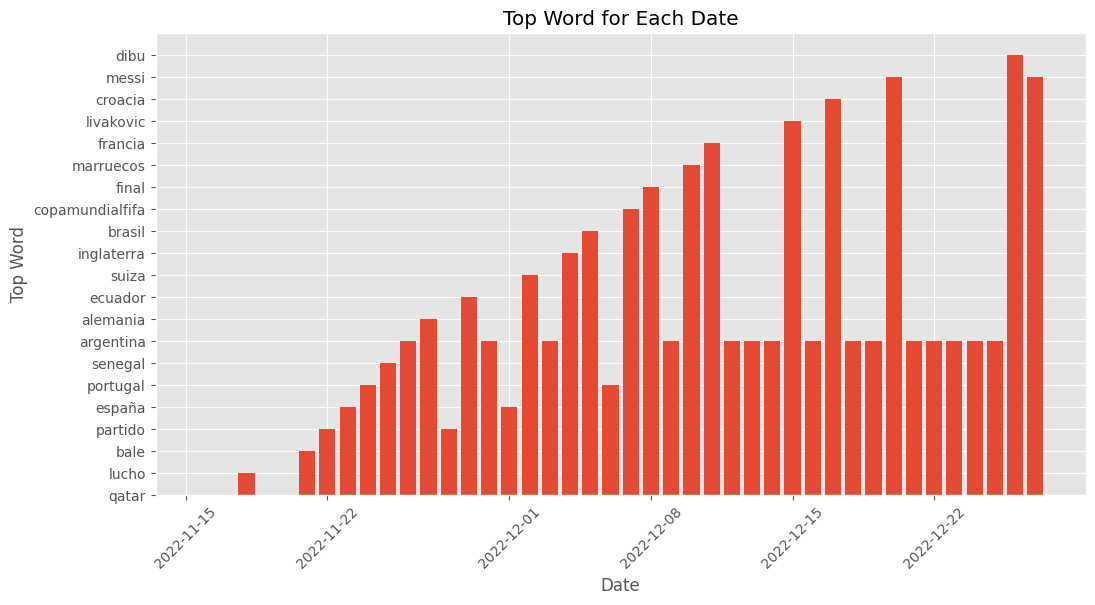

In [28]:
# Graph top words
plt.figure(figsize=(12, 6))
plt.bar(df_01_daily_words["Date"], df_01_daily_words["Top Word"])
plt.xlabel("Date")
plt.ylabel("Top Word")
plt.title("Top Word for Each Date")
plt.xticks(rotation=45)
plt.show()

<h2> Cuantas palabras cada dia

In [29]:
df_01_daily_words = pd.concat(dfs)
df_01_daily_words = df_01_daily_words.reset_index()

In [30]:
df_01_daily_words["time"] = pd.to_datetime(
    df_01_daily_words["time"], errors="coerce"
)

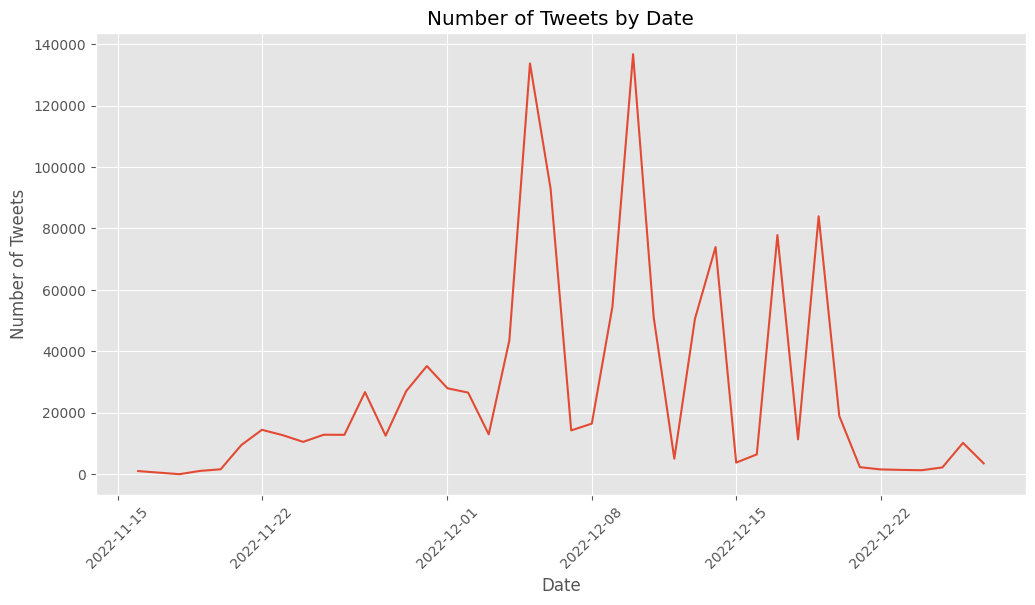

In [31]:
# Group the DataFrame by date and count the number of tweets
date_counts = (
    df_01_daily_words.groupby(df_01_daily_words["time"].dt.date)
    .size()
    .reset_index(name="Count")
)

# Plot the number of tweets by date
plt.figure(figsize=(12, 6))
plt.plot(date_counts["time"], date_counts["Count"])
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Date")
plt.xticks(rotation=45)
plt.show()

## 02 - Nube de palabras

In [32]:
# Word cloud df
df_02_wordcloud = pd.concat(dfs)

Note: installed wordcloud-1.9.1.1

In [33]:
# Generate word cloud with stopwords removed
stopwords = set(stopwords.words("spanish"))

# stopwords.update(["en", "el", "la", "de", "lo", "que", "del",
#                  "y", "con", "un", "hoy", "hasta", "las", "los",
#                  "todo" , "uno", "te", "vs", "despues"])

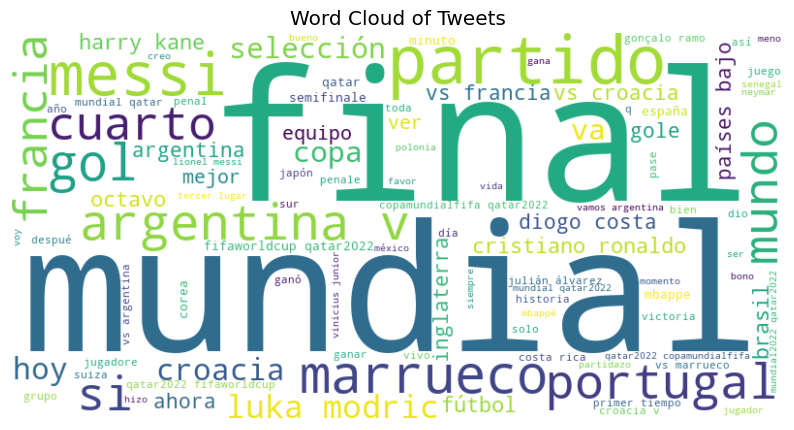

In [34]:
# Concatenate all tweets into a single string
TEXT = " ".join(df_02_wordcloud["tweets"].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color="white",
    stopwords=stopwords,
).generate(TEXT)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

### Inconsistencias / errores en el dataset

## 03. Pre procesamiento

In [52]:
# Pre processing df
df_03_pre = original_df

In [53]:
df_03_pre

,tweet_id,tweets,likes,time,tokens,filtered_tokens,stemmed_tokens
0,1.593005e+18,hay que ser patriota y cumplir la constitucin...,0.0,2022-11-16 22:16:45+00:00,"[hay, que, ser, patriota, y, cumplir, la, cons...","[patriota, cumplir, constitucin, tambin, orgul...","[patriot, cumpl, constitucin, tambin, orgull, ..."
1,1.593005e+18,la decepcin de esta copa mundial ser argentina...,0.0,2022-11-16 22:16:44+00:00,"[la, decepcin, de, esta, copa, mundial, ser, a...","[decepcin, copa, mundial, argentina, tena, qu,...","[decepcin, cop, mundial, argentin, ten, qu, pe..."
2,1.593005e+18,como que se han dado cuenta unos cuantos aos t...,0.0,2022-11-16 22:16:44+00:00,"[como, que, se, han, dado, cuenta, unos, cuant...","[cuantos, aos, tarde, problemas, iba, organiza...","[cuant, aos, tard, problem, iba, organiz, mund..."
3,1.593005e+18,no s si es su perfil pero le ruego deje el se...,0.0,2022-11-16 22:16:44+00:00,"[no, s, si, es, su, perfil, pero, le, ruego, d...","[s, perfil, ruego, deje, sevilla, socio, accio...","[s, perfil, rueg, dej, sevill, soci, accion, j..."
4,1.593005e+18,espaa se aloja en el mismo lugar que la selecc...,0.0,2022-11-16 22:16:43+00:00,"[espaa, se, aloja, en, el, mismo, lugar, que, ...","[espaa, aloja, seleccin, mundial, qatar, 2022,...","[espa, aloj, seleccin, mundial, qat, 2022, sel..."
...,...,...,...,...,...,...,...
17495,1.607491e+18,dibu martnez se tatu la copa del mundo con una...,0.0,2022-12-26 21:39:18+00:00,"[dibu, martnez, se, tatu, la, copa, del, mundo...","[dibu, martnez, tatu, copa, mundo, enigmtica, ...","[dibu, martnez, tatu, cop, mund, enigmt, dedic..."
17496,1.607491e+18,epale pablosin duda para m el dibu martnezno ...,1.0,2022-12-26 21:38:02+00:00,"[epale, pablosin, duda, para, m, el, dibu, mar...","[epale, pablosin, duda, m, dibu, martnezno, ab...","[epal, pablosin, dud, m, dibu, martnezn, abra,..."
17497,1.607491e+18,tercera victoria consecutiva liverpool derro...,1.0,2022-12-26 21:36:28+00:00,"[tercera, victoria, consecutiva, liverpool, de...","[victoria, consecutiva, liverpool, derrot, ast...","[victori, consecut, liverpool, derrot, aston, ..."
17498,1.607490e+18,ya el parlamento europeo sac un proyecto de le...,1.0,2022-12-26 21:35:34+00:00,"[ya, el, parlamento, europeo, sac, un, proyect...","[parlamento, europeo, sac, proyecto, ley, leer...","[parlament, europe, sac, proyect, ley, leer, d..."


In [54]:
# Custom stopwords
custom_stopwords_file = (
    r"C:\Users\Cacu\Desktop\Universidad\Trabajo_Final\utilities\stopwords.txt"
)
with open(custom_stopwords_file, "r", encoding="utf-8") as file:
    custom_stopwords_list = [line.strip() for line in file]

# Create an empty set to hold the stopwords
custom_stopwords_set = set()

# Add the stopwords from the list to the set
custom_stopwords_set.update(custom_stopwords_list)

In [55]:
from bs4 import BeautifulSoup
from textblob import TextBlob

In [56]:
# Download NLTK resources if not already downloaded
nltk.download("punkt")
nltk.download("stopwords")

# Specify the Snowball stemmer for Spanish
stemmer = SnowballStemmer("spanish")

df_03_pre["tweets"] = df_03_pre["tweets"].fillna("")

# Lowercasing
df_03_pre["tweets"] = df_03_pre["tweets"].str.lower()

# Removing punctuation
df_03_pre["tweets"] = df_03_pre["tweets"].str.replace("[^\w\s]", "")

# Tokenization
df_03_pre["tokens"] = df_03_pre["tweets"].apply(word_tokenize)

# Removing stop words
stop_words = custom_stopwords_set
df_03_pre["filtered_tokens"] = df_03_pre["tokens"].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Remove HTML tags
df_03_pre["tweets"] = df_03_pre["tweets"].apply(
    lambda text: BeautifulSoup(text, "html.parser").get_text()
)

# Remove non-alphanumeric characters
df_03_pre["tweets"] = df_03_pre["tweets"].str.replace(
    r"[^a-zA-Z0-9\sáéíóúÁÉÍÓÚ]", ""
)


# Stemming
df_03_pre["stemmed_tokens"] = df_03_pre["filtered_tokens"].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Cacu\AppData\Local\Temp\ipykernel_6360\3936882906.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_03_pre["tweets"] = df_03_pre["tweets"].str.replace("[^\w\s]", "")
C:\Users\Cacu\AppData\Local\Temp\ipykernel_6360\3936882906.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df_03_pre["tweets"] = df_03_pre["tweets"].str.replace(


In [57]:
df_03_wordcloud

,tweet_id,tweets,likes,time,tokens,filtered_tokens,stemmed_tokens
0,1.593005e+18,hay que ser patriota y cumplir la constitucin...,0.0,2022-11-16 22:16:45+00:00,"[hay, que, ser, patriota, y, cumplir, la, cons...","[patriota, cumplir, constitucin, tambin, orgul...","[patriot, cumpl, constitucin, tambin, orgull, ..."
1,1.593005e+18,la decepcin de esta copa mundial ser argentina...,0.0,2022-11-16 22:16:44+00:00,"[la, decepcin, de, esta, copa, mundial, ser, a...","[decepcin, copa, mundial, argentina, tena, qu,...","[decepcin, cop, mundial, argentin, ten, qu, pe..."
2,1.593005e+18,como que se han dado cuenta unos cuantos aos t...,0.0,2022-11-16 22:16:44+00:00,"[como, que, se, han, dado, cuenta, unos, cuant...","[cuantos, aos, tarde, problemas, iba, organiza...","[cuant, aos, tard, problem, iba, organiz, mund..."
3,1.593005e+18,no s si es su perfil pero le ruego deje el se...,0.0,2022-11-16 22:16:44+00:00,"[no, s, si, es, su, perfil, pero, le, ruego, d...","[s, perfil, ruego, deje, sevilla, socio, accio...","[s, perfil, rueg, dej, sevill, soci, accion, j..."
4,1.593005e+18,espaa se aloja en el mismo lugar que la selecc...,0.0,2022-11-16 22:16:43+00:00,"[espaa, se, aloja, en, el, mismo, lugar, que, ...","[espaa, aloja, seleccin, mundial, qatar, 2022,...","[espa, aloj, seleccin, mundial, qat, 2022, sel..."
...,...,...,...,...,...,...,...
17495,1.607491e+18,dibu martnez se tatu la copa del mundo con una...,0.0,2022-12-26 21:39:18+00:00,"[dibu, martnez, se, tatu, la, copa, del, mundo...","[dibu, martnez, tatu, copa, mundo, enigmtica, ...","[dibu, martnez, tatu, cop, mund, enigmt, dedic..."
17496,1.607491e+18,epale pablosin duda para m el dibu martnezno ...,1.0,2022-12-26 21:38:02+00:00,"[epale, pablosin, duda, para, m, el, dibu, mar...","[epale, pablosin, duda, m, dibu, martnezno, ab...","[epal, pablosin, dud, m, dibu, martnezn, abra,..."
17497,1.607491e+18,tercera victoria consecutiva liverpool derro...,1.0,2022-12-26 21:36:28+00:00,"[tercera, victoria, consecutiva, liverpool, de...","[victoria, consecutiva, liverpool, derrot, ast...","[victori, consecut, liverpool, derrot, aston, ..."
17498,1.607490e+18,ya el parlamento europeo sac un proyecto de le...,1.0,2022-12-26 21:35:34+00:00,"[ya, el, parlamento, europeo, sac, un, proyect...","[parlamento, europeo, sac, proyecto, ley, leer...","[parlament, europe, sac, proyect, ley, leer, d..."
